# Midterm Activity 3
### Logistic Regression
> Due Date: June 21, 2025
- Dominguez, Harry Jr.
- Lapig, Cazandra Jae

## Data Exploration

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)
cancer = pd.read_csv('data/heart_disease_prediction.csv')
cancer.head(10)

,gender,age,educationLevel,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,tenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


educationLevel    105
cigsPerDay         29
BPMeds             53
totChol            50
BMI                19
heartRate           1
glucose           388
dtype: int64


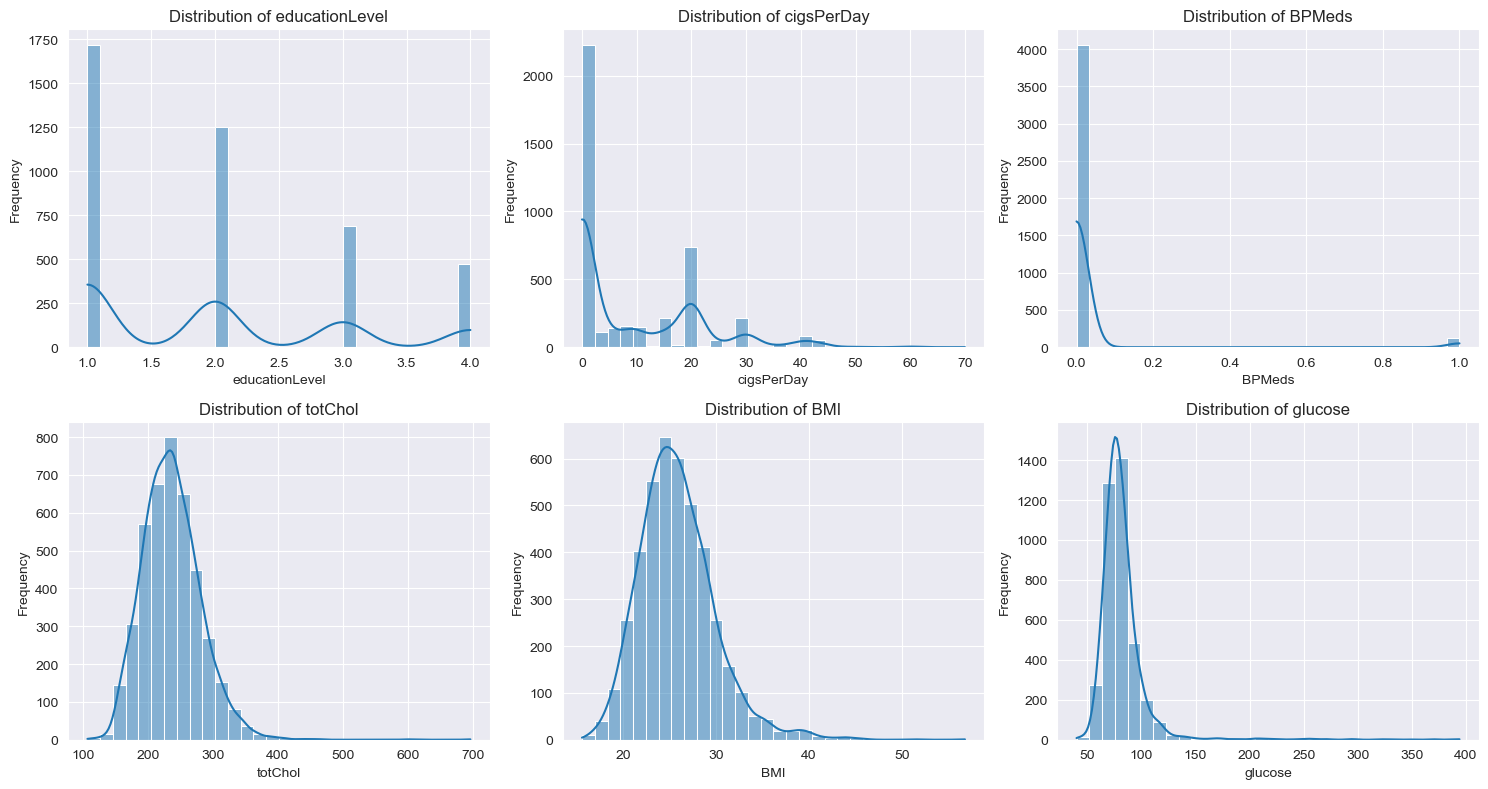

In [413]:
# Check Features with Missing Values
nan_counts = cancer.isna().sum()
print(nan_counts[nan_counts > 0])
features = ['educationLevel', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']
n_rows = (len(features) + 3 - 1) // 3

# Create Histograms to see Skewness
plt.figure(figsize=(3 * 5, n_rows * 4))
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(cancer[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [414]:
from sklearn.impute import SimpleImputer

# The Features with missing values are mostly right skewed, kaya Median gagamitin pang-impute
imputer = SimpleImputer(strategy='median')
cancer = pd.DataFrame(imputer.fit_transform(cancer), columns=cancer.columns)
nan_counts = cancer.isna().sum()
print(nan_counts[nan_counts > 0])  # Should be empty

Series([], dtype: int64)


In [415]:
# Separate Features and Target Attribute
features = cancer.drop(columns=['tenYearCHD'])
target = cancer['tenYearCHD']
# Separate Categorical and Numeric Features
categorical = features[
    ['gender', 'educationLevel', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
numeric = features.drop(columns=categorical.columns)

## Data Preprocessing

In [416]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding to Categorical Features
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(categorical)
one_hot_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical.columns))
one_hot_cat

,gender_0.0,gender_1.0,educationLevel_1.0,educationLevel_2.0,educationLevel_3.0,educationLevel_4.0,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4234,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4235,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4236,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [417]:
from sklearn.preprocessing import StandardScaler

# Standardize Numeric Columns
scaler = StandardScaler()
standard_num = scaler.fit_transform(numeric)
standard_num = pd.DataFrame(standard_num, columns=numeric.columns)
standard_num

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234951,-0.751322,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359
1,-0.418257,-0.751322,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099
2,-0.184916,0.929210,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537
3,1.331800,1.769476,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872
4,-0.418257,1.181289,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558
...,...,...,...,...,...,...,...,...
4233,0.048425,-0.667296,1.721723,2.116930,0.764648,0.041713,-0.821599,0.192298
4234,0.165095,2.861821,-0.669856,-0.265590,-0.242955,-1.496159,-0.904768,-0.595016
4235,-0.184916,0.929210,0.255189,-0.061374,-0.914691,-0.933583,0.675436,0.192298
4236,-0.651598,0.509077,-0.602170,-0.265590,0.344813,-1.631275,0.841773,-0.157620


In [418]:
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.multitest import multipletests

# Combine features
processed_cancer = pd.concat([one_hot_cat, standard_num], axis=1)

# Compute for P-Values of Features
selector = SelectKBest(score_func=f_classif, k='all')  # use all features, sort later
selector.fit(processed_cancer, target)

# Extract p-values and scores
p_values = selector.pvalues_.round(6)
scores = selector.scores_

adjusted = multipletests(p_values, method='fdr_bh')
p_values = adjusted[1]

# Degrees of freedom
n_samples = processed_cancer.shape[0]
n_classes = len(set(target))  # assumes classification target
df1 = n_classes - 1
df2 = n_samples - n_classes

# Combine into DataFrame
cat_scores = pd.DataFrame({
    'Feature': processed_cancer.columns,
    'F-Score': scores,
    'p-value': p_values,
    'df1': df1,
    'df2': df2
}).sort_values('p-value')

cat_scores

,Feature,F-Score,p-value,df1,df2
0,gender_0.0,33.384171,0.000000,1,4236
1,gender_1.0,33.384171,0.000000,1,4236
2,educationLevel_1.0,29.026859,0.000000,1,4236
14,diabetes_0.0,40.500615,0.000000,1,4236
12,prevalentHyp_0.0,137.966856,0.000000,1,4236
13,prevalentHyp_1.0,137.966856,0.000000,1,4236
9,BPMeds_1.0,31.872136,0.000000,1,4236
8,BPMeds_0.0,31.872136,0.000000,1,4236
15,diabetes_1.0,40.500615,0.000000,1,4236
19,sysBP,208.171803,0.000000,1,4236


In [419]:
from sklearn.decomposition import PCA

# Remove Features with adjusted p-score > 0.05
processed_cancer = processed_cancer.drop(
    columns=['educationLevel_3.0', 'heartRate', 'currentSmoker_0.0', 'currentSmoker_1.0',
             'educationLevel_4.0'])  # 19 Features Left

# Apply PCA
pca = PCA(n_components=8)
pca.fit_transform(processed_cancer)
sum(pca.explained_variance_ratio_)  # >= 8 Components should do

np.float64(0.9334581815063998)

In [420]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split dataset
pca_cancer = pca.fit_transform(processed_cancer)

# Set aside 10% of the Dataset for verification
cancer_data, verification_data, cancer_target, verification_target = train_test_split(pca_cancer, target, test_size=0.1,
                                                                                      random_state=10)

# Split data 80:20 for training
x_train, x_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.2, random_state=10)

In [421]:
# Train the Model
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("\nClassification Report:")
result = pd.DataFrame([{
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
}])
result


Classification Report:


,Accuracy,Precision,Recall,F1-Score
0,0.855832,0.6,0.079646,0.140625


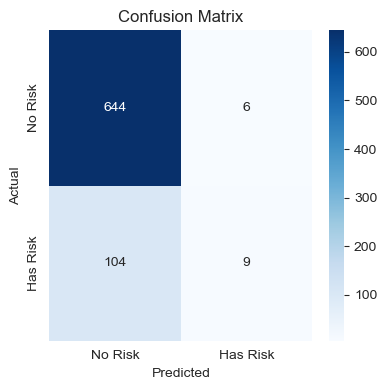

In [422]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Risk', 'Has Risk']
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [423]:
# Test on 10% remaining data
test_pred = model.predict(verification_data)
print("\nClassification Report:")
result = pd.DataFrame([{
    'Accuracy': accuracy_score(verification_target, test_pred),
    'Precision': precision_score(verification_target, test_pred),
    'Recall': recall_score(verification_target, test_pred),
    'F1-Score': f1_score(verification_target, test_pred),
}])
result


Classification Report:


,Accuracy,Precision,Recall,F1-Score
0,0.846698,0.5,0.046154,0.084507


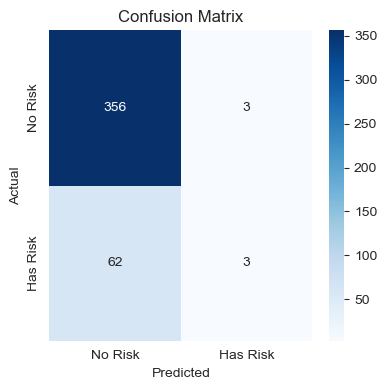

In [424]:
# Confusion matrix of 10% remaining data
cm = confusion_matrix(verification_target, test_pred)
labels = ['No Risk', 'Has Risk']
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [425]:
# Extract Logistic Regression model
# feature_names = pca_cancer.columns
coefs = model.coef_[0]
pca_features = [f'X{i+1}' for i in range(len(coefs))]
intercept = model.intercept_[0]

coef_df = pd.DataFrame({
    'Feature': pca_features,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

logit_expr = f"logit(p) = {intercept:.3f} "
for feat, coef in zip(pca_features, coefs):
    logit_expr += f"+ ({coef:.3f} × {feat}) "
print("\nLogistic Model Equation:\n", logit_expr)
print("\nIntercept:", intercept)
coef_df


Logistic Model Equation:
 logit(p) = -1.978 + (0.423 × X1) + (0.050 × X2) + (0.124 × X3) + (0.422 × X4) + (-0.251 × X5) + (0.425 × X6) + (-0.207 × X7) + (0.004 × X8) 

Intercept: -1.9779347533363636


,Feature,Coefficient
5,X6,0.424746
0,X1,0.423436
3,X4,0.422160
4,X5,-0.251187
6,X7,-0.206774
2,X3,0.123630
1,X2,0.049803
7,X8,0.004423
